# Unconstrained Optimization with First and Second order Information

$$\min_{x \in \mathbb{R}^n} f(x)$$

We are interested in obtaining a solution for this problem. We will look at:

1.   How the **function properties** affect the convergence
2.   How **different optimizers** behave


### Imports and Useful Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot_function(f, x_range, y_range, global_minimizers=[], local_minimizers=[]):
    x = np.linspace(x_range[0], x_range[1], 200)
    y = np.linspace(y_range[0], y_range[1], 200)
    X, Y = np.meshgrid(x, y)

    # Evaluate f(x, y) in the grid
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f.f(np.array([X[i, j], Y[i, j]]))

    # --- Plot 3D Surface ---
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)

    ax1.set_xlabel(r'$x_1$')
    ax1.set_ylabel(r'$x_2$')
    ax1.set_zlabel('f(x)')


    # --- Plot Level Curves ---
    ax2 = fig.add_subplot(1, 2, 2)
    contours = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
    ax2.clabel(contours, inline=True, fontsize=8)
    for minimizer in global_minimizers:
        ax2.plot(minimizer[0], minimizer[1], 'ro') #, label='Global Minimizers')
    for minimizer in local_minimizers:
        ax2.plot(minimizer[0], minimizer[1], 'bo') #, label='Local Minimizers')
    ax2.set_title('Level Curves of f(x)')
    ax2.set_xlabel(r'$x_1$')
    ax2.set_ylabel(r'$x_2$')

    plt.scatter([], [], color='red', label='global minimizer')
    plt.scatter([], [], color='blue', label='local minimizer')

    # Add legend
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

## Strongly Convex Objective Function

$$f(x) = \frac{1}{2} x^T \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix} x + x^T \begin{bmatrix} 1 \\ 1 \end{bmatrix} + 1$$

In [2]:
class strong_convex_prob():

    def __init__(self):
        self.Q = np.array([[1, 0], [0, 2]])
        self.c = np.array([1, 1])
        self.b = 1

    def f(self, x):
        return 1/2 * x.T @ self.Q @ x + self.c.T @ x + self.b

    def g(self, x):
        return self.Q @ x + self.c

    def hessian(self, x):
        return self.Q


In [3]:
prob_str_cvx = strong_convex_prob()

x0 = np.array([1,1])
print('f(x0)=', prob_str_cvx.f(x0))
print('g(x0)=', prob_str_cvx.g(x0))
print('h(x0)=', prob_str_cvx.hessian(x0))

f(x0)= 4.5
g(x0)= [2 3]
h(x0)= [[1 0]
 [0 2]]


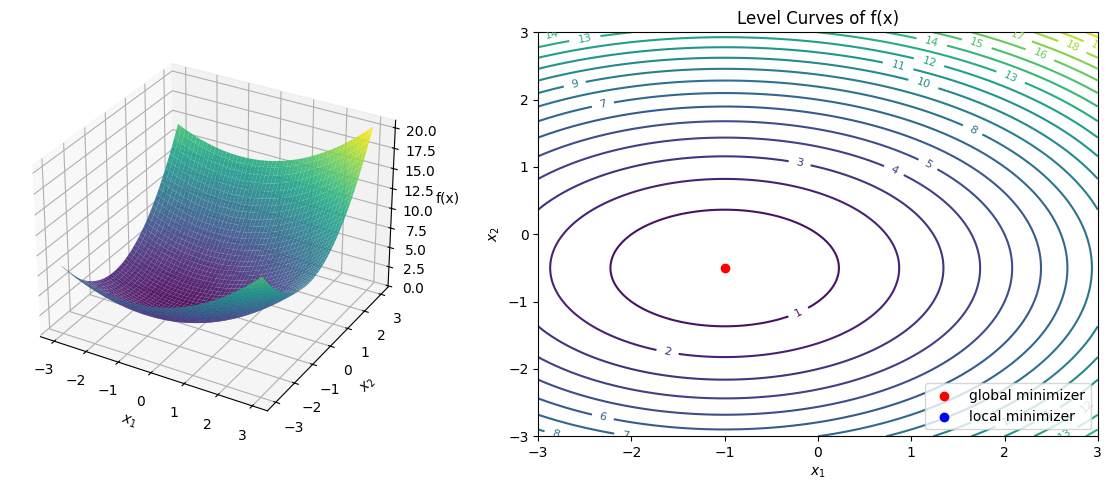

In [4]:
plot_function(prob_str_cvx, x_range=(-3, 3), y_range=(-3, 3), global_minimizers=[np.array([-1, -1/2])], local_minimizers=[])

## Convex Objective Function

$$f(x) = \frac{1}{2} x^T \begin{bmatrix} 2 & -2 \\ -2 & 2 \end{bmatrix} x$$

In [11]:
class convex_prob():

    def __init__(self):
        self.Q = np.array([[2, -2], [-2, 2]])

    def f(self, x):
        return 1/2 * x.T @ self.Q @ x

    def g(self, x):
        return self.Q @ x

    def hessian(self, x):
        return self.Q


In [6]:
prob_cvx = convex_prob()

x0 = np.array([3,1])
print('f(x0)=', prob_cvx.f(x0))
print('g(x0)=', prob_cvx.g(x0))
print('h(x0)=', prob_cvx.hessian(x0))

f(x0)= 4.0
g(x0)= [ 4 -4]
h(x0)= [[ 2 -2]
 [-2  2]]


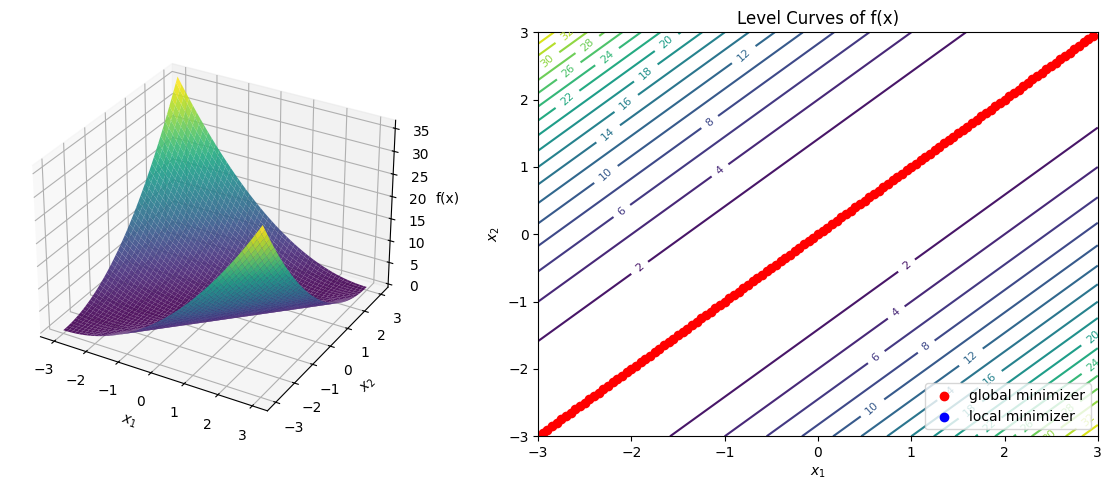

In [7]:
plot_function(prob_cvx, x_range=(-3, 3), y_range=(-3, 3), global_minimizers=[np.array([i,i]) for i in np.arange(-3,3, 0.05)], local_minimizers=[])

## Convex Objective - Cross-entropy Loss

\begin{aligned}
\min_{w \in \mathbb{R}^d} \;
f(w)
&= -\frac{1}{n} \sum_{i=1}^{n}
\Big[
y_i \log(\sigma(x_i^\top w))
+ (1 - y_i) \log(1 - \sigma(x_i^\top w))
\Big], \\[6pt]
\text{where} \quad
\sigma(z) &= \frac{1}{1 + e^{-z}}.
\end{aligned}



In [12]:
class logistic_regression_prob():
    def __init__(self):
        self.X = np.array([
            [1.0, 2.0],
            [2.0, 1.0],
            [2.0, 3.0],
            [3.0, 2.0]
        ])
        self.y = np.array([0, 0, 1, 1])  # labels in {0,1}
        self.n, self.d = self.X.shape

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def f(self, w):
        z = self.X @ w
        p = self.sigmoid(z)
        loss = - np.mean(self.y * np.log(p + 1e-12) + (1 - self.y) * np.log(1 - p + 1e-12))
        return loss

    def g(self, w):
        z = self.X @ w
        p = self.sigmoid(z)
        grad = (1.0 / self.n) * self.X.T @ (p - self.y)   # gradient
        return grad

    def hessian(self, w):
        z = self.X @ w
        p = self.sigmoid(z)
        D = np.diag(p * (1 - p))
        H = (1.0 / self.n) * self.X.T @ D @ self.X
        return H


In [13]:
prob_cvx = logistic_regression_prob()

x0 = np.array([3,1])
print('f(x0)=', prob_cvx.f(x0))
print('g(x0)=', prob_cvx.g(x0))
print('h(x0)=', prob_cvx.hessian(x0))


f(x0)= 3.001941729361238
g(x0)= [0.74779704 0.74632492]
h(x0)= [[0.00273319 0.00398926]
 [0.00398926 0.00716992]]


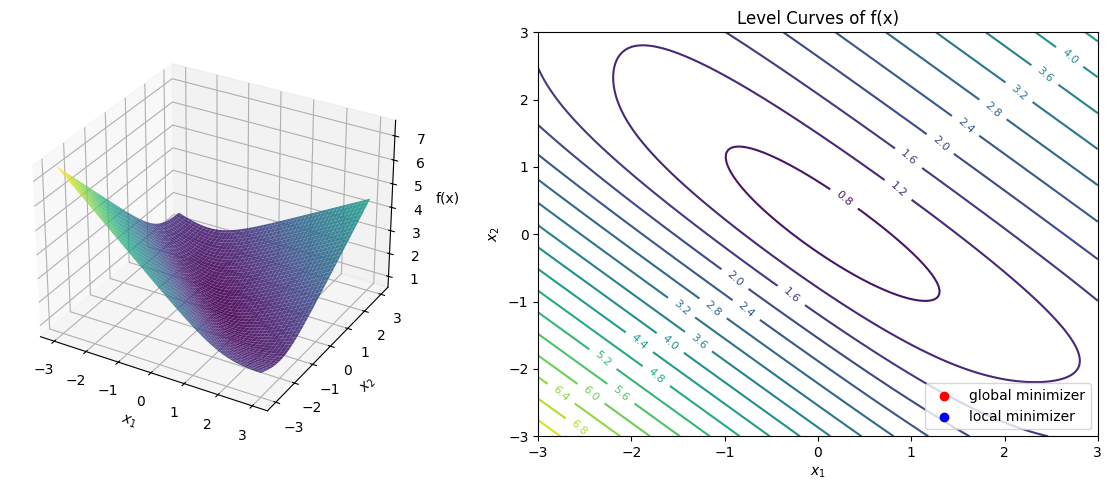

In [14]:
plot_function(prob_cvx, x_range=(-3, 3), y_range=(-3, 3), global_minimizers=[], local_minimizers=[])

## Nonconvex Objective Function

$$f(x) = 2(x_1^2 - 1)^2 + x_2^2, \quad x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

In [15]:
class nonconvex_prob():

    def __init__(self):
        pass

    def f(self, x):
        return 2 * (x[0]**2 - 1)**2 + x[1]**2

    def g(self, x):
        return np.array([8*(x[0]**3) - 8 *x[0], 2 * x[1]])

    def hessian(self, x):
        return np.array([[24*(x[0]**2) - 8, 0], [0, 2]])

In [16]:
prob_noncvx = nonconvex_prob()

x0 = np.array([0.5, 1])
print('f(x0)=', prob_noncvx.f(x0))
print('g(x0)=', prob_noncvx.g(x0))
print('h(x0)=', prob_noncvx.hessian(x0))

f(x0)= 2.125
g(x0)= [-3.  2.]
h(x0)= [[-2.  0.]
 [ 0.  2.]]


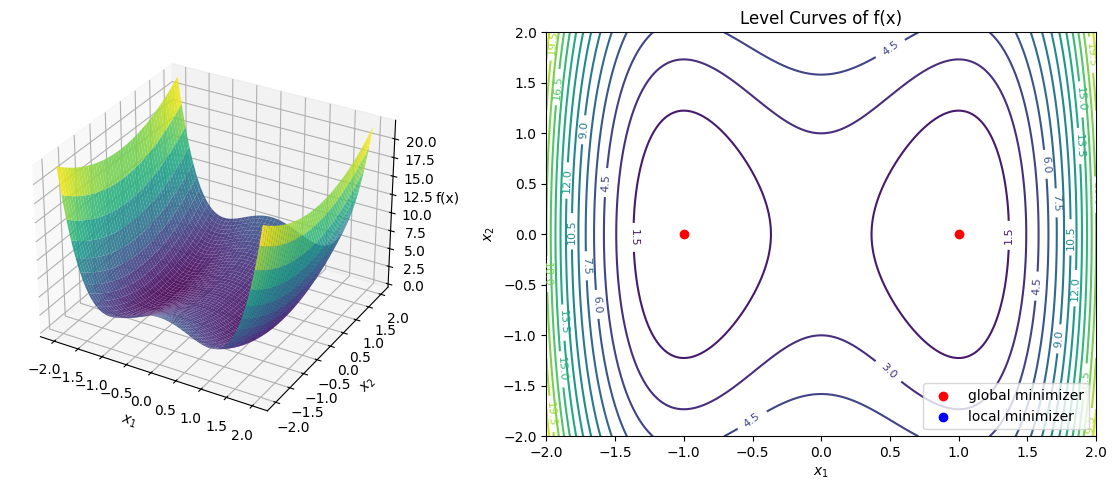

In [17]:
plot_function(prob_noncvx, x_range=(-2, 2), y_range=(-2, 2), global_minimizers=[[1,0], [-1,0]], local_minimizers=[])

## Another Nonconvex Objective Function with many local minima

$$f(x) = \sin^2(3 x_1) + \sin^2(3 x_2) + x^Tx, \quad x =
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \in \mathbb{R}^2
$$

In [18]:
class nonconvex_sin_prob():

    def __init__(self):
        pass

    def f(self, x):
        return np.sin(3*x[0])**2 + np.sin(3*x[1])**2 + np.sum(x**2)

    def g(self, x):
        grad_x1 = 3 * np.sin(6*x[0]) + 2*x[0]
        grad_x2 = 3 * np.sin(6*x[1]) + 2*x[1]
        return np.array([grad_x1, grad_x2])

    def hessian(self, x):
        h11 = 18 * np.cos(6*x[0]) + 2
        h22 = 18 * np.cos(6*x[1]) + 2
        return np.array([[h11, 0], [0, h22]])

In [19]:
prob_noncvx_sin = nonconvex_sin_prob()

# x0 = np.array([0.935027, 0])
# x0 = np.array([0.591108, 0.591108])
x0 = np.array([0.5, 1])
print('f(x0)=', prob_noncvx_sin.f(x0))
print('g(x0)=', prob_noncvx_sin.g(x0))
print('h(x0)=', prob_noncvx_sin.hessian(x0))

f(x0)= 2.26491110497504
g(x0)= [1.42336002 1.16175351]
h(x0)= [[-15.81986494   0.        ]
 [  0.          19.28306516]]


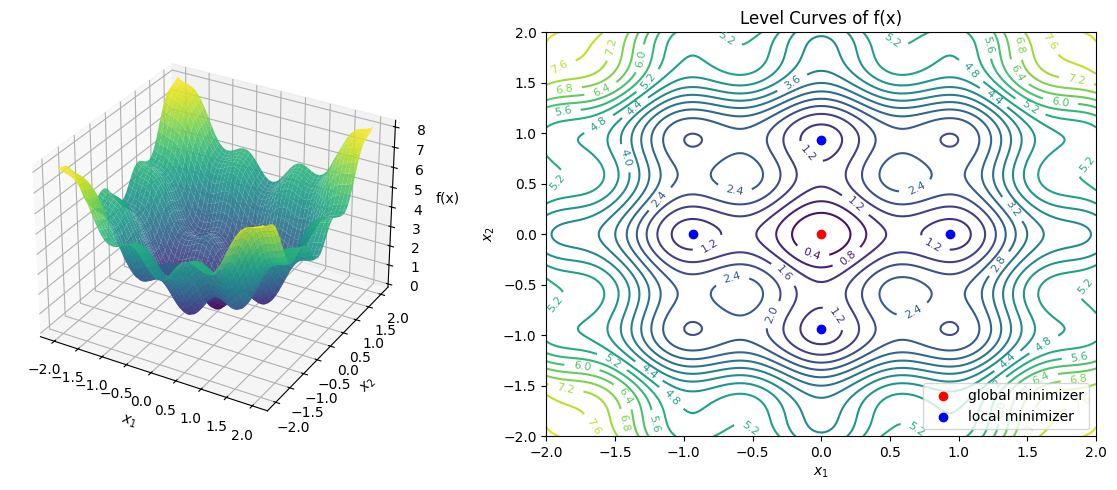

In [20]:
plot_function(prob_noncvx_sin, x_range=(-2, 2), y_range=(-2, 2), global_minimizers=[[0,0]],
              local_minimizers=[[0.935027, 0], [-0.935027, 0], [0, 0.935027], [0, -0.935027]])

## The Rosenbrock Function
$$ f(x) = (1-x_1)^2 + 100*(x_2 - x_1^2)^2$$

In [21]:
import numpy as np

class RosenbrockProblem():

    def __init__(self):
        pass

    def f(self, x):
        return (1 - x[0])**2 + 100.0*(x[1] - x[0]**2)**2

    def g(self, x):
        dfdx1 = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
        dfdx2 = 200*(x[1] - x[0]**2)
        return np.array([dfdx1, dfdx2])

    def hessian(self, x):
        h11 = 2 - 400*(x[1] - x[0]**2) + 800*x[0]**2
        h12 = -400*x[0]
        h22 = 200.0
        return np.array([[h11, h12],
                         [h12, h22]])

In [22]:
prob_rosenbrock = RosenbrockProblem()

x0 = np.array([0.5, 1])
print('f(x0)=', prob_rosenbrock.f(x0))
print('g(x0)=', prob_rosenbrock.g(x0))
print('h(x0)=', prob_rosenbrock.hessian(x0))

f(x0)= 56.5
g(x0)= [-151.  150.]
h(x0)= [[ -98. -200.]
 [-200.  200.]]


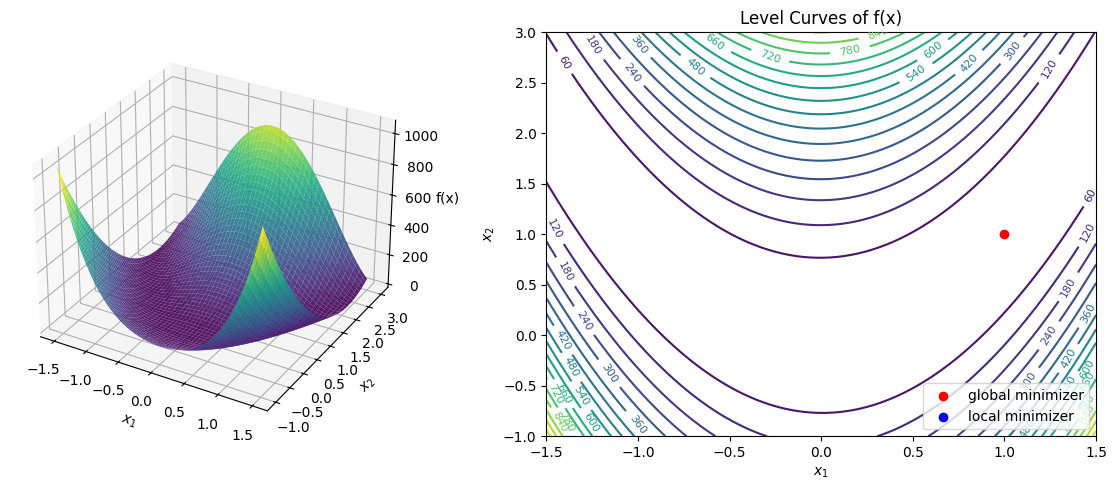

In [23]:
plot_function(prob_rosenbrock, x_range=(-1.5, 1.5), y_range=(-1, 3), global_minimizers=[[1,1]],
              local_minimizers=[])

# Implementing an Optimizer

The suggestion is to make a class that contains the main functionalities of our optimizer. The main ingredients are:
1. The update rule
2. A loop of updates
3. The termination condition

Each algorithm has its own parameters:
* GD has the step size
* L-BFGS has the memory size

but some parameters are shared:
* The termination threshold (e.g. $\|\nabla f(x^k)\| < ϵ$)
* The maximal number of iterations

In [24]:
max_iter = 1000
eps = 1e-6

## Gradient Descent
$$x^{k+1} = x^k - \alpha \nabla f(x^k)$$

In [25]:
class gd():

    def __init__(self, stepsize, eps, max_iter, verbose=True):
        self.stepsize = stepsize
        self.eps = eps
        self.max_iter = max_iter
        self.verbose = verbose

    def solve(self, problem, x0):

        x = x0.copy()

        if self.verbose: print('  k             f           norm_g             x')

        for k in range(self.max_iter):

            f_curr = problem.f(x)
            g_curr = problem.g(x)
            g_norm = np.linalg.norm(g_curr)

            if g_norm <= self.eps: # controllo terminazione
                if self.verbose: print(f"{k:>3d} {f_curr:>15.6g} {g_norm:>15.6g}     {x}")
                print("Solution with ||g|| < eps found!")
                break

            x = x - self.stepsize * g_curr

            if self.verbose: print(f"{k:>3d} {f_curr:>15.6g} {g_norm:>15.6g}     {x}")

        if k == self.max_iter-1:
            print("Maximum number of iterations reached!")

        return x, f_curr, g_norm, k

In [26]:
gd_opt = gd(stepsize=10, eps=eps, max_iter=20)

gd_opt.solve(problem=prob_str_cvx, x0=np.array([3,1]))

  k             f           norm_g             x
  0            10.5               5     [-37 -29]
  1          1460.5         67.4166     [323 541]
  2          345710         1130.43     [ -2917 -10289]
  3     1.10105e+08         20782.6     [ 26243 195481]
  4     3.85574e+10          391843     [ -236197 -3714149]
  5     1.38228e+13     7.43205e+06     [ 2125763 70568821]
  6     4.98222e+15     1.41154e+08     [  -19131877 -1340807609]
  7     1.79795e+18     2.68168e+09     [  172186883 25475344561]
  8     6.49008e+20      5.0951e+10     [  -1549681957 -484031546669]
  9     2.34288e+23     9.68064e+11     [  13947137603 9196599386701]
 10     8.45775e+25     1.83932e+13     [   -125524238437 -174735388347329]
 11     3.05325e+28     3.49471e+14     [   1129718145923 3319972378599241]
 12     1.10222e+31     6.63994e+15     [   -10167463313317 -63079475193385589]
 13     3.97902e+33     1.26159e+17     [     91507169819843 1198510028674326181]
 14     1.43643e+36     2.39702e+

(array([-6709570384900939645, -3385424258013738759]),
 np.float64(9.409544945812861e+37),
 np.float64(5.438238836885612e+18),
 19)

In [27]:
gd_opt = gd(stepsize=0.1, eps=1e-4, max_iter=200)

gd_opt.solve(problem=prob_str_cvx, x0=np.array([3,1]))

  k             f           norm_g             x
  0            10.5               5     [2.6 0.7]
  1            8.17         4.32666     [2.24 0.46]
  2          6.4204         3.76617     [1.916 0.268]
  3         5.09135         3.29581     [1.6244 0.1144]
  4         4.07123         2.89783     [ 1.36196 -0.00848]
  5         3.28102         2.55836     [ 1.125764 -0.106784]
  6         2.66406         2.26657     [ 0.9131876 -0.1854272]
  7          2.1791         2.01398     [ 0.72186884 -0.24834176]
  8         1.79575         1.79392     [ 0.54968196 -0.29867341]
  9         1.49129         1.60114     [ 0.39471376 -0.33893873]
 10         1.24855         1.43143     [ 0.25524238 -0.37115098]
 11         1.05442         1.28142     [ 0.12971815 -0.39692078]
 12        0.898757         1.14837     [ 0.01674633 -0.41753663]
 13        0.773687         1.03004     [-0.0849283 -0.4340293]
 14         0.67303        0.924535     [-0.17643547 -0.44722344]
 15        0.591915        

(array([-0.99990438, -0.5       ]),
 np.float64(0.25000000457169114),
 np.float64(9.56210359965023e-05),
 101)

## Gradient Descent with Armijo's Line-Search

$$x^{k+1} = x^k - \alpha_k \nabla f(x^k)$$

$$f(x^k - \alpha_k \nabla f(x^k)) \leq f(x^k) - \alpha_k \gamma \|\nabla f(x^k)\|^2 $$

In [28]:
class gd_ls():

    def __init__(self, alpha0, gamma, delta, eps, max_iter, verbose=True):
        self.alpha0 = alpha0
        self.gamma = gamma
        self.delta = delta
        self.eps = eps
        self.max_iter = max_iter
        self.verbose = verbose

    def solve(self, problem, x0):

        x = x0.copy()

        if self.verbose: print('  k             f           norm_g             x                 alpha    n_backtracks')

        for k in range(self.max_iter):

            f_curr = problem.f(x) # !!!
            g_curr = problem.g(x)
            g_norm = np.linalg.norm(g_curr)

            if g_norm <= self.eps: # controllo terminazione
                if self.verbose:
                    print(f"{k:>3d} {f_curr:>15.6g} {g_norm:>15.6g}    [{x[0]:>10.6g},{x[1]:>10.6g}] {alpha:>8.6g} {n_backtracks:>4d}")
                    print("Solution with ||g|| < eps found!")
                break

            x, f_next, alpha, n_backtracks = self.armijo_ls(problem, x, f_curr, g_curr, g_norm)

            if self.verbose: print(f"{k:>3d} {f_curr:>15.6g} {g_norm:>15.6g}    [{x[0]:>10.6g},{x[1]:>10.6g}] {alpha:>8.6g} {n_backtracks:>4d}")

        if k == self.max_iter-1:
            print("Maximum number of iterations reached!")

        return x, f_curr, g_norm, k


    def armijo_ls(self, problem, curr_x, f_curr, g_curr, g_norm):

        alpha = self.alpha0

        x_tent = curr_x - alpha * g_curr
        f_tent = problem.f(x_tent)
        n_backtracks = 0

        while f_tent > f_curr - self.gamma * alpha * (g_norm**2):

            alpha = self.delta * alpha

            x_tent = curr_x - alpha * g_curr
            f_tent = problem.f(x_tent)
            n_backtracks += 1

        return x_tent, f_tent, alpha, n_backtracks


In [29]:
gd_opt_ls = gd_ls(alpha0=10, gamma=0.01, delta=0.5, eps=eps, max_iter=50)

gd_opt_ls.solve(problem=prob_str_cvx, x0=np.array([3,1]))

  k             f           norm_g             x                 alpha    n_backtracks
  0            10.5               5    [        -2,     -2.75]     1.25    3
  1          5.8125         4.60977    [    -1.375,    0.0625]    0.625    4
  2        0.636719         1.18585    [  -1.14062, -0.640625]    0.625    4
  3        0.279663        0.314447    [  -1.05273, -0.464844]    0.625    4
  4        0.252626       0.0878906    [  -1.01978, -0.508789]    0.625    4
  5        0.250273       0.0264586    [ -0.995056, -0.486816]     1.25    3
  6        0.250186       0.0268267    [ -0.998146, -0.503296]    0.625    4
  7        0.250013      0.00684755    [ -0.999305, -0.499176]    0.625    4
  8        0.250001       0.0017886    [ -0.999739, -0.500206]    0.625    4
  9            0.25     0.000487549    [ -0.999902, -0.499949]    0.625    4
 10            0.25     0.000142009    [  -1.00002, -0.500077]     1.25    3
 11            0.25     0.000156417    [  -1.00001, -0.499981]    

(array([-1.00000048, -0.5000003 ]),
 np.float64(0.25000000000020783),
 np.float64(7.731939602827378e-07),
 15)

## GD and Non-Convex Functions
Using a gradient based algorithm on a Non-Convex function could lead to different stationary points.


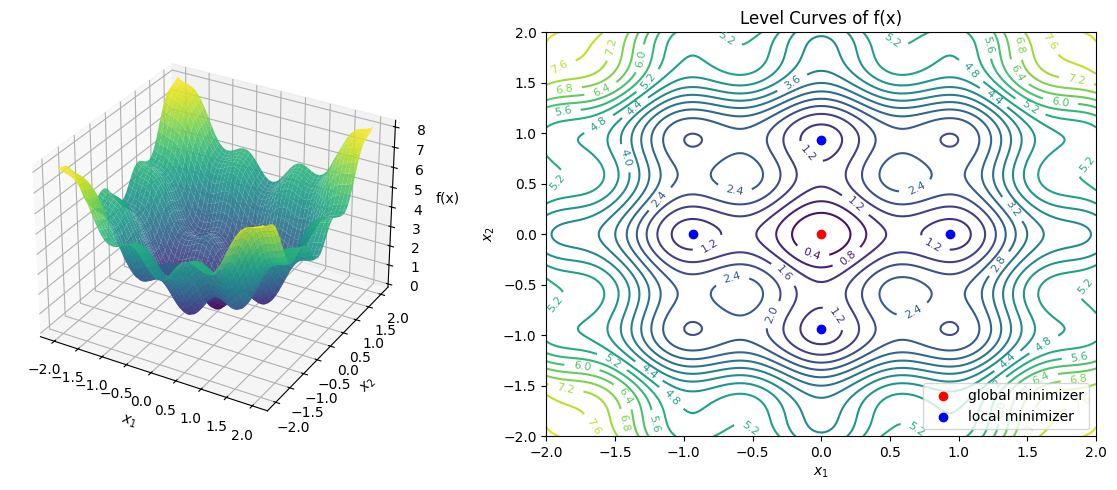

In [30]:
plot_function(prob_noncvx_sin, x_range=(-2, 2), y_range=(-2, 2), global_minimizers=[[0,0]],
              local_minimizers=[[0.935027, 0], [-0.935027, 0], [0, 0.935027], [0, -0.935027]])

In [31]:
gd_opt_ls = gd_ls(alpha0=0.1, gamma=0.01, delta=0.5, eps=eps, max_iter=50)
gd_opt_ls.solve(prob_noncvx_sin, x0=np.array([-1.5, 0.5]))

  k             f           norm_g             x                 alpha    n_backtracks
  0         4.45056         4.46908    [  -1.07636,  0.357664]      0.1    0
  1         2.06612         4.19591    [ -0.808859, 0.0344041]      0.1    0
  2          1.0959         1.51558    [  -0.94412,-0.0339653]      0.1    0
  3        0.995478        0.691304    [ -0.929232,  0.033543]      0.1    0
  4         0.99479         0.67311    [ -0.933833,0.000203385]     0.05    1
  5        0.983317        0.019584    [ -0.935748,-0.000203385]      0.1    0
  6         0.98331       0.0122991    [ -0.934588,0.000203385]      0.1    0
  7        0.983307      0.00814985    [ -0.935294,-0.000203384]      0.1    0
  8        0.983306      0.00590903    [ -0.934865,0.000203384]      0.1    0
  9        0.983306      0.00483048    [ -0.935126,-0.000203384]      0.1    0
 10        0.983306      0.00436454    [ -0.934967,0.000203384]      0.1    0
 11        0.983306      0.00417974    [ -0.935064,-0.00

(array([-9.35027337e-01, -4.54301800e-11]),
 np.float64(0.9833051631612444),
 np.float64(7.842452745940478e-07),
 23)

In [32]:
gd_opt_ls = gd_ls(alpha0=0.1, gamma=0.01, delta=0.5, eps=eps, max_iter=50)
gd_opt_ls.solve(prob_noncvx_sin, x0=np.array([-0.5, 0.5]))

  k             f           norm_g             x                 alpha    n_backtracks
  0         2.48999         2.01294    [ -0.357664,  0.357664]      0.1    0
  1         1.79984         4.57158    [-0.0344041, 0.0344041]      0.1    0
  2       0.0235973        0.966889    [-0.000219432,0.000219432]     0.05    1
  3     9.63009e-07      0.00620647    [-5.7055e-11,5.7055e-11]     0.05    1
  4     6.51056e-20     1.61376e-09    [-5.7055e-11,5.7055e-11]     0.05    1
Solution with ||g|| < eps found!


(array([-5.70550415e-11,  5.70550415e-11]),
 np.float64(6.51055551908742e-20),
 np.float64(1.6137602695676232e-09),
 4)

In practical settings it is very hard to have a *``good''* initial solution $x_0$ that will drive us to a global minimum. Running the algorithm from many random initialization points is indeed a possibility.

In [33]:
gd_opt_ls = gd_ls(alpha0=0.1, gamma=0.01, delta=0.5, eps=eps, max_iter=50, verbose=False)

for _ in range(5):
    x0 = np.random.rand(2) * 6 - 3 # random initialization in [-3,3]x[-3,3]
    x, f, g_norm, k = gd_opt_ls.solve(prob_noncvx_sin, x0=x0)

    print(f"x0:{x0}     x:{x}        f:{f:>3.6f}   g_norm:{g_norm:>3.6f}  k: {k}")

x0:[-0.85062058 -2.47592552]     x:[-0.93502731 -0.93502733]        f:1.966610   g_norm:0.000001  k: 29
x0:[ 2.35174152 -1.80779878]     x:[ 0.93502725 -0.93502733]        f:1.966610   g_norm:0.000001  k: 32
x0:[-0.0451775  -0.33253193]     x:[-4.46361009e-10 -5.36417495e-17]        f:0.000000   g_norm:0.000000  k: 4
x0:[-1.50772365 -1.58684679]     x:[-0.93502729 -0.93502734]        f:1.966610   g_norm:0.000001  k: 30
x0:[-1.94143236  1.82800221]     x:[-0.93502726  0.93502734]        f:1.966610   g_norm:0.000001  k: 33


When considering a convex problem this is not a problem anymore

In [34]:
for _ in range(5):
    x0 = np.random.rand(2) * 6 - 3 # random initialization in [-3,3]x[-3,3]
    x, f, g_norm, k = gd_opt_ls.solve(prob_str_cvx, x0=x0)

    print(f"x0:{x0}     x:{x}        f:{f:>3.6f}   g_norm:{g_norm:>3.6f}    k:{k}")

Maximum number of iterations reached!
x0:[-2.092121    1.11284639]     x:[-1.00562855 -0.49997698]        f:0.250020   g_norm:0.006254    k:49
Maximum number of iterations reached!
x0:[-0.17823085 -1.74376009]     x:[-0.99576479 -0.50001775]        f:0.250011   g_norm:0.004706    k:49
Maximum number of iterations reached!
x0:[ 2.82941888 -0.38489039]     x:[-0.98026404 -0.49999836]        f:0.250240   g_norm:0.021929    k:49
Maximum number of iterations reached!
x0:[2.3385185  1.77987403]     x:[-0.98279403 -0.49996746]        f:0.250183   g_norm:0.019118    k:49
Maximum number of iterations reached!
x0:[2.94538961 1.75543701]     x:[-0.97966635 -0.49996781]        f:0.250255   g_norm:0.022593    k:49


## Multiple Accumulation points
As we know the convergence proof of GD states that the sequence of points $\{x^k\}$ admits accumulation points and each of them is stationary.

This behavior can sometimes occur in practice, as we see in this example.

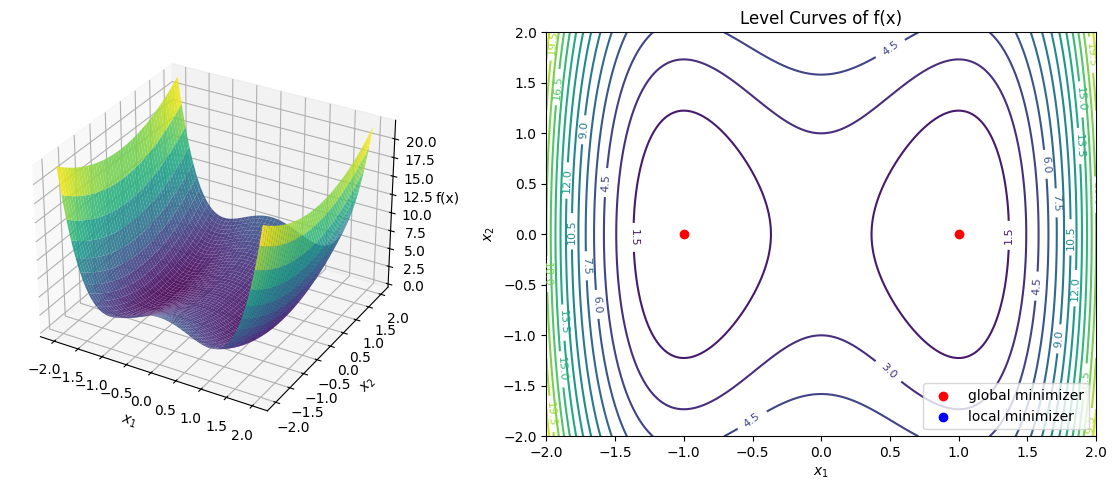

In [35]:
plot_function(prob_noncvx, x_range=(-2, 2), y_range=(-2, 2), global_minimizers=[[1,0], [-1,0]], local_minimizers=[])

In [36]:
gd_opt_ls = gd_ls(alpha0=100, gamma=1e-10, delta=0.999, eps=1e-2, max_iter=1000)

x, f, g_norm, k = gd_opt_ls.solve(prob_noncvx, x0=np.array([1.5, 0.2]))

  k             f           norm_g             x                 alpha    n_backtracks
  0           3.165         15.0053    [   -1.5015,   0.11996]   0.2001 6211
  1         3.16197         15.0711    [    1.5018, 0.0721437] 0.199301 6215
  2         3.15725         15.0835    [  -1.50122, 0.0434158] 0.199102 6216
  3         3.14516         15.0562    [   1.49946, 0.0261102] 0.199301 6215
  4         3.11752         14.9751    [  -1.49704, 0.0156609]   0.2001 6211
  5           3.081          14.864    [   1.49516,0.00935566] 0.201305 6205
  6         3.05302         14.7782    [  -1.49468,0.00557009] 0.202314 6200
  7         3.04595         14.7565    [   1.49376,0.00331401] 0.202517 6199
  8         3.03229         14.7143    [  -1.49211,0.00196904] 0.202923 6197
  9         3.00804         14.6392    [   1.49042,0.00116671] 0.203736 6193
 10         2.98344         14.5627    [  -1.48844, 0.0006894] 0.204553 6189
 11          2.9546         14.4729    [   1.48689,0.000405947] 0.

## Newton's Method
$$x^{k+1} = x^k - [\nabla^2 f(x^k)]^{-1} \nabla f(x^k)$$

In [37]:
class newton():

    def __init__(self, eps, max_iter, toll=1e-4, globalize=False, alpha0=1, gamma=1e-4, delta=0.5, verbose=True):
        self.eps = eps
        self.max_iter = max_iter

        self.globalize = globalize
        self.alpha0 = alpha0
        self.gamma = gamma
        self.delta = delta
        self.toll = toll

        self.verbose = verbose


    def solve(self, problem, x0):

        x = x0.copy()

        if self.verbose: print('  k             f           norm_g             x')

        for k in range(self.max_iter):

            f_curr = problem.f(x)
            g_curr = problem.g(x)
            g_norm = np.linalg.norm(g_curr)

            if self.verbose: print(f"{k:>3d} {f_curr:>15.6g} {g_norm:>15.6g}     {x}")

            if g_norm <= self.eps: # controllo terminazione
                print("Solution with ||g|| < eps found!")
                break

            h_curr = problem.hessian(x)

            if self.globalize:
                # Controlliamo che l'hessiana sia def. positiva
                min_eig = np.min(np.linalg.eigvals(h_curr))

                if min_eig < self.toll:
                    if self.verbose: print("Hessian Corrected")
                    h_curr = h_curr + np.ones_like(h_curr) * (self.toll - min_eig)

                h_curr_inv = np.linalg.inv(h_curr)

                d = - h_curr_inv @ g_curr

                x, _, _, _ = self.armijo_ls(problem=problem, curr_x=x, f_curr=f_curr, d=d, g_curr=g_curr)

            else:

                h_curr_inv = np.linalg.inv(h_curr)

                x = x - h_curr_inv @ g_curr

        if k == self.max_iter-1:
            print("Maximum number of iterations reached!")

        return x, f_curr, g_norm, k


    def armijo_ls(self, problem, curr_x, f_curr, d, g_curr):

            alpha = self.alpha0

            x_tent = curr_x + alpha * d
            f_tent = problem.f(x_tent)
            n_backtracks = 0

            suff_dec_cond = g_curr.T @ d

            while f_tent > f_curr - self.gamma * alpha * suff_dec_cond and alpha > 1e-4:

                alpha = self.delta * alpha

                x_tent = curr_x + alpha * d
                f_tent = problem.f(x_tent)
                n_backtracks += 1

            return x_tent, f_tent, alpha, n_backtracks


In [38]:
x0 = np.array([3.1, 3.1])
# prob = prob_str_cvx
# prob = prob_noncvx
prob = prob_noncvx_sin
newton_opt = newton(eps=1e-8, max_iter=100)

x, f, g_norm, k = newton_opt.solve(prob, x0=x0)

  k             f           norm_g             x
  0          19.251          7.7203     [3.1 3.1]
  1         17.2515         4.00846     [2.81921784 2.81921784]
  2         25.3453         13.7657     [3.46353959 3.46353959]
  3         66.8719         17.6445     [5.69819862 5.69819862]
  4         86.5655         22.7443     [6.54162255 6.54162255]
  5         1.15366         4.98935     [-0.26415065 -0.26415065]
  6         7.61127         1.16103     [1.75638606 1.75638606]
  7         7.81519         1.40438     [1.8944387 1.8944387]
  8         7.64428         1.01202     [1.77797751 1.77797751]
  9          8.0149         2.61891     [1.96660575 1.96660575]
 10          7.7307        0.977736     [1.84284587 1.84284587]
 11         7.20686         3.34164     [1.62027906 1.62027906]
 12         7.64087         1.02516     [1.77560523 1.77560523]
 13         7.97465         2.38509     [1.95522482 1.95522482]
 14         7.72063        0.949423     [1.83545156 1.83545156]
 15  

In [39]:
gd_opt_ls = gd_ls(alpha0=10, gamma=1e-4, delta=0.5, eps=1e-8, max_iter=100)

x, f, g_norm, k = gd_opt_ls.solve(prob, x0=x0)

  k             f           norm_g             x                 alpha    n_backtracks
  0          19.251          7.7203    [ -0.311924, -0.311924]    0.625    4
  1         1.49083         4.93446    [  0.233262,  0.233262]  0.15625    6
  2        0.938433         4.84036    [-0.0341329,-0.0341329] 0.078125    7
  3       0.0232279        0.959364    [ 0.0188649, 0.0188649] 0.078125    7
  4      0.00711088        0.532556    [-0.0105549,-0.0105549] 0.078125    7
  5      0.00222746        0.298359    [0.00592722,0.00592722] 0.078125    7
  6     0.000702573        0.167615    [-0.00333231,-0.00333231] 0.078125    7
  7     0.000222079       0.0942462    [0.00187411,0.00187411] 0.078125    7
  8     7.02451e-05       0.0530068    [-0.00105413,-0.00105413] 0.078125    7
  9     2.22238e-05       0.0298152    [0.000592939,0.000592939] 0.078125    7
 10     7.03152e-06       0.0167708    [-0.000333526,-0.000333526] 0.078125    7
 11      2.2248e-06      0.00943355    [0.000187608,0.00

As we know from theory Newton's method converges only when initialized in a ball of the solution $x^*$.

Let's consider:

$$f(x) = \frac{1}{x_0^4} - \frac{2}{x_0^2} + \frac{3}{x_1^4} - \frac{4}{x_1^2}
$$

In [40]:
import numpy as np

class f_test:

    def __init__(self):
        pass

    def f(self, x):
        return 1/(x[0]**4) - 2/(x[0]**2) + 3/(x[1]**4) - 4/(x[1]**2)

    def g(self, x):
        return np.array([-4/(x[0]**5) + 4/(x[0]**3), - 12/(x[1]**5) + 8/(x[1]**3)])

    def hessian(self, x):
        h11 = 20/(x[0]**6) - 12/(x[0]**4)
        h22 = 60/(x[1]**6) - 24/(x[1]**4)
        return np.array([[h11, 0], [0, h22]])

In [41]:
prob = f_test()

x0 = np.array([3,1])
print('f(x0)=', prob.f(x0))
print('g(x0)=', prob.g(x0))
print('h(x0)=', prob.hessian(x0))

f(x0)= -1.2098765432098766
g(x0)= [ 0.13168724 -4.        ]
h(x0)= [[-0.12071331  0.        ]
 [ 0.         36.        ]]


In [42]:
x0 = np.array([10., 10.])
# x0 = np.array([0.1, 0.1])

newton_opt = newton(eps=1e-10, max_iter=1000, globalize=True)

x, f, g_norm, k = newton_opt.solve(prob, x0=x0)

  k             f           norm_g             x
  0         -0.0596      0.00881907     [10. 10.]
Hessian Corrected
  1      -0.0825204       0.0148202     [ 6.7686183 10.0457135]
Hessian Corrected
  2       -0.108909        0.020941     [6.70984983 7.79731523]
Hessian Corrected
  3       -0.222107       0.0639236     [4.13628985 6.00483869]
Hessian Corrected
  4        -0.30854       0.0986183     [3.95185674 4.57092557]
Hessian Corrected
  5       -0.640575        0.302748     [2.35095991 3.47034369]
Hessian Corrected
  6       -0.908137        0.471387     [2.22018931 2.55173899]
Hessian Corrected
  7        -1.89645        0.992284     [1.15809248 1.78330221]
Hessian Corrected
  8        -1.89629        0.992075     [1.15800281 1.78359907]
Hessian Corrected
  9        -1.89612        0.991866     [1.15791321 1.78389587]
Hessian Corrected
 10        -1.89596        0.991657     [1.15782369 1.7841926 ]
Hessian Corrected
 11         -1.8958        0.991447     [1.15773423 1.78448926]

## Conjugate Gradient Method

\begin{align*}
&x^{k+1} = x^k + \alpha_k d_k \\[2mm]
& \beta_{k+1} = \frac{\|\nabla f(x^{k+1})\|^2}{\|\nabla f(x^k)\|^2}\\[2mm]
&d_{k+1} = - \nabla f(x^{k+1}) + \beta_{k+1} d_k
\end{align*}

In [43]:
class cg():

    def __init__(self, alpha0, gamma, delta, eps, max_iter, verbose=True):
        self.eps = eps
        self.max_iter = max_iter
        self.alpha0 = alpha0
        self.gamma = gamma
        self.delta = delta
        self.verbose = verbose

    def solve(self, problem, x0):

        x = x0.copy()

        f_curr = problem.f(x)
        g_curr = problem.g(x)
        g_norm = np.linalg.norm(g_curr)

        g_prev = g_curr.copy()
        d = - g_curr

        alpha = 0
        n_backtracks = 0

        if self.verbose: print('  k             f           norm_g             x                 alpha    n_backtracks')

        for k in range(self.max_iter):

            if self.verbose: print(f"{k:>3d} {f_curr:>15.6g} {g_norm:>15.6g}    [{x[0]:>10.6g},{x[1]:>10.6g}] {alpha:>8.6g} {n_backtracks:>4d}")

            if g_norm <= self.eps: # controllo terminazione
                print("Solution with ||g|| < eps found!")
                break

            x, f_next, alpha, n_backtracks = self.armijo_ls(problem=problem, curr_x=x, f_curr=f_curr, d=d, g_curr=g_curr)

            g_prev = g_curr.copy()
            f_curr = f_next
            g_curr = problem.g(x)

            beta = np.dot((g_curr - g_prev), g_curr)/(g_norm**2 + 1e-8) # Polyak-Polak-Ribiere
            # beta = np.dot(g_curr, g_curr)/(g_norm**2 + 1e-8) # Fletcher-Reeves

            g_norm = np.linalg.norm(g_curr)

            beta = max(beta, 0)
            d = - g_curr + beta * d

        if k == self.max_iter-1:
            print("Maximum number of iterations reached!")

        return x, f_curr, g_norm, k

    def armijo_ls(self, problem, curr_x, f_curr, d, g_curr):

            alpha = self.alpha0

            x_tent = curr_x + alpha * d
            f_tent = problem.f(x_tent)
            n_backtracks = 0

            suff_dec_cond = g_curr.T @ d

            while f_tent > f_curr - self.gamma * alpha * suff_dec_cond:

                alpha = self.delta * alpha

                x_tent = curr_x + alpha * d
                f_tent = problem.f(x_tent)
                n_backtracks += 1

            return x_tent, f_tent, alpha, n_backtracks


In [44]:
x0 = np.array([3.1, 3.1])
# prob = prob_str_cvx
# prob = prob_noncvx
prob = prob_noncvx_sin
cg_opt = cg(alpha0=10,  gamma=0.01, delta=0.5, eps=1e-4, max_iter=100)

x, f, g_norm, k = cg_opt.solve(prob, x0=x0)

  k             f           norm_g             x                 alpha    n_backtracks
  0          19.251          7.7203    [       3.1,       3.1]        0    0
  1         1.49083         4.93446    [ -0.311924, -0.311924]    0.625    4
  2         1.49083         4.93446    [ -0.311924, -0.311924] 8.67362e-18   60
  3        0.938433         4.84036    [  0.233262,  0.233262]  0.15625    6
  4        0.938433         4.84036    [  0.233262,  0.233262] 2.1684e-18   62
  5       0.0232279        0.959364    [-0.0341329,-0.0341329] 0.078125    7
  6       0.0232279        0.959364    [-0.0341329,-0.0341329] 1.73472e-17   59
  7      0.00711088        0.532556    [ 0.0188649, 0.0188649] 0.078125    7
  8      0.00711088        0.532556    [ 0.0188649, 0.0188649] 4.33681e-18   61
  9      0.00222746        0.298359    [-0.0105549,-0.0105549] 0.078125    7
 10      0.00222746        0.298359    [-0.0105549,-0.0105549] 4.33681e-18   61
 11     0.000702573        0.167615    [0.00592722,0

## Quasi-Newton Method

\begin{align*}
x^{k+1} &= x^k - \alpha_k H_k \nabla f(x^k) \\[2mm]
H_{k+1} &= H_k + \left(1 + \frac{y_k^T H_k y_k}{s_k^T y_k} \right)
 \frac{s_k s_k^T}{s_k^T y_k} - \frac{s_k y_k^T H_k + H_k y_k s_k^T}{s_k^T y_k} \\[2mm]
 s_k &= x_{k+1} - x_k \qquad y_k = \nabla f(x^{k+1}) - \nabla f(x^K)
 \end{align*}



In [45]:
class quasi_newton():

    def __init__(self, alpha0, gamma, delta, eps, max_iter, verbose=True):
        self.eps = eps
        self.max_iter = max_iter
        self.alpha0 = alpha0
        self.gamma = gamma
        self.delta = delta
        self.verbose = verbose

    def solve(self, problem, x0):

        x = x0.copy()

        f_curr = problem.f(x)
        g_curr = problem.g(x)
        g_norm = np.linalg.norm(g_curr)

        g_prev = g_curr.copy()
        H = np.identity(len(x))

        alpha = 0
        n_backtracks = 0

        if self.verbose: print('  k             f           norm_g             x                 alpha    n_backtracks')

        for k in range(self.max_iter):

            if self.verbose: print(f"{k:>3d} {f_curr:>15.6g} {g_norm:>15.6g}    [{x[0]:>10.6g},{x[1]:>10.6g}] {alpha:>8.6g} {n_backtracks:>4d}")

            if g_norm <= self.eps: # controllo terminazione
                print("Solution with ||g|| < eps found!")
                break

            d =  - np.matmul(H, g_curr)
            x_next, f_next, alpha, n_backtracks = self.armijo_ls(problem=problem, curr_x=x, f_curr=f_curr, d=d, g_curr=g_curr)

            x_prev = x.copy()
            x = x_next
            s = x - x_prev

            f_curr = f_next

            g_prev = g_curr.copy()
            g_curr = problem.g(x)
            g_norm = np.linalg.norm(g_curr)

            y = g_curr - g_prev

            sTy = np.dot(s,y)

            H = H + (1+np.matmul(y,np.matmul(H,y))/sTy)*np.outer(s,s)/sTy - (np.matmul(np.outer(s,y),H) + np.matmul(H,np.outer(y,s)))/sTy

        if k == self.max_iter-1:
            print("Maximum number of iterations reached!")

        return x, f_curr, g_norm, k


    def armijo_ls(self, problem, curr_x, f_curr, d, g_curr):

        alpha = self.alpha0

        x_tent = curr_x + alpha * d
        f_tent = problem.f(x_tent)
        n_backtracks = 0

        suff_dec_cond = g_curr.T @ d

        while f_tent > f_curr - self.gamma * alpha * suff_dec_cond:

            alpha = self.delta * alpha

            x_tent = curr_x + alpha * d
            f_tent = problem.f(x_tent)
            n_backtracks += 1

        return x_tent, f_tent, alpha, n_backtracks


In [46]:
x0 = np.array([3.1, 3.1])
# prob = prob_str_cvx
# prob = prob_noncvx
prob = prob_noncvx_sin
qn_opt = quasi_newton(alpha0=1,  gamma=0.01, delta=0.5, eps=1e-6, max_iter=100)

x, f, g_norm, k = qn_opt.solve(prob, x0=x0)

  k             f           norm_g             x                 alpha    n_backtracks
  0          19.251          7.7203    [       3.1,       3.1]        0    0
  1         12.1478         10.9145    [  -2.35908,  -2.35908]        1    0
  2         2.09332         1.65931    [   0.83833,   0.83833]        1    0
  3          2.0036         1.15042    [  0.981642,  0.981642]     0.25    2
  4         1.96891        0.267106    [  0.922964,  0.922964]        1    0
  5         1.96663       0.0228352    [  0.934021,  0.934021]        1    0
  6         1.96661      0.00061407    [  0.935054,  0.935054]        1    0
  7         1.96661     1.30013e-06    [  0.935027,  0.935027]        1    0
  8         1.96661     9.63925e-11    [  0.935027,  0.935027]        1    0
Solution with ||g|| < eps found!


## Scipy's Implementations
Scipy is a Python library that packs some of the most used optimizers for unconstraied and constrained optimization.

https://docs.scipy.org/doc/scipy/tutorial/optimize.html


In [51]:
from scipy.optimize import minimize

x0 = np.array([3.1, 3.1])
prob = prob_noncvx_sin

res = minimize(prob.f, x0, method='CG', jac=prob.g, tol=1e-3, options={'disp': True})
# res = minimize(prob.f, x0, method='BFGS', jac=prob.g, tol=1e-3, options={'disp': True})
# res = minimize(prob.f, x0, method='L-BFGS-B', jac=prob.g, tol=1e-3, options={'disp': True})

print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 11
         Gradient evaluations: 11
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 3.8140133958264945e-08
       x: [ 4.367e-05  4.367e-05]
     nit: 3
     jac: [ 8.734e-04  8.734e-04]
    nfev: 11
    njev: 11


# Higher Dimensional Problems
Bidimensional problems are not a reliable benchmark to asses the performances of the algorithms here tested. We consider higher dimensional problems now.

## A random Quadratic Convex Problem

In [52]:
class quadratic_convex_prob():

    def __init__(self, N):
        rng = np.random.default_rng(seed=42)

        A = rng.random((N, N))
        self.Q = A.T @ A
        self.c = rng.random((N,))
        self.b = rng.random((1,))

    def f(self, x):
        return 1/2 * x.T @ self.Q @ x + self.c.T @ x + self.b

    def g(self, x):
        return self.Q @ x + self.c

    def hessian(self, x):
        return self.Q


In [53]:
prob = quadratic_convex_prob(10)

x0 = np.array([1] * 10)
print('f(x0)=', prob.f(x0))
print('g(x0)=', prob.g(x0))
print('h(x0)=', prob.hessian(x0))

f(x0)= [126.93392609]
g(x0)= [25.80320627 27.90584355 34.48457822 27.80283312 22.44278822 24.45482403
 23.70312485 18.40674516 15.30342617 26.58935834]
h(x0)= [[3.05425248 2.81669272 3.51488498 2.79772379 2.17965929 2.22210569
  2.47818964 1.9246556  1.28353563 2.62292577]
 [2.81669272 3.84551819 3.47819274 2.79774764 2.42273698 2.41816945
  2.39408274 1.7865156  2.05660129 3.18987906]
 [3.51488498 3.47819274 5.21926396 3.79605315 2.9741733  3.32011376
  3.45451534 2.71475046 2.13123961 3.61552097]
 [2.79772379 2.79774764 3.79605315 3.45077222 2.64631562 2.6263095
  2.63314925 1.78211359 1.52405666 2.77941533]
 [2.17965929 2.42273698 2.9741733  2.64631562 2.71945557 2.21328488
  1.88553391 1.2692455  1.36356556 1.9900667 ]
 [2.22210569 2.41816945 3.32011376 2.6263095  2.21328488 3.12543534
  2.3394533  2.0074794  1.30717477 2.15840775]
 [2.47818964 2.39408274 3.45451534 2.63314925 1.88553391 2.3394533
  2.53397055 1.81833029 1.3265688  2.38996954]
 [1.9246556  1.7865156  2.71475046 1.7

In [54]:
N = 10

prob = quadratic_convex_prob(N)
eps = 1e-3
max_iter = 1000000
x0 = np.array([1] * N)

gd_opt_ls = gd_ls(alpha0=1, gamma=1e-4, delta=0.5, eps=eps, max_iter=max_iter, verbose=False)

x, f, g_norm, n_iter = gd_opt_ls.solve(prob, x0=x0)

print(f"GD+LS    f:{f},     g_norm:{g_norm},    n_iter:{n_iter} \n")


newton_opt = newton(eps=eps, max_iter=max_iter, globalize=True, verbose=False)

x, f, g_norm, n_iter = newton_opt.solve(prob, x0=x0)

print(f"Newton    f:{f},     g_norm:{g_norm},    n_iter:{n_iter} \n")


cg_opt = cg(alpha0=1., gamma=1e-4, delta=0.5, eps=eps, max_iter=max_iter,  verbose=False)

x, f, g_norm, n_iter = cg_opt.solve(prob, x0=x0)

print(f"CG    f:{f},     g_norm:{g_norm},    n_iter:{n_iter} \n")


quasi_newton_opt = quasi_newton(alpha0=1, gamma=0.01, delta=0.5, eps=eps, max_iter=max_iter,  verbose=False)

x, f, g_norm, n_iter = quasi_newton_opt.solve(prob, x0=x0)

print(f"Quasi-Newton    f:{f},     g_norm:{g_norm},    n_iter:{n_iter} \n")


res = minimize(prob.f, x0, method='L-BFGS-B', jac=prob.g, tol=eps)

print(f"L-BFGS Scipy     f:{res['fun']},    n_iter:{res['nit']} \n")

res = minimize(prob.f, x0, method='CG', jac=prob.g, tol=eps)

print(f"CG Scipy     f:{res['fun']},    n_iter:{res['nit']}")

GD+LS    f:[-24.99594785],     g_norm:0.0009872920239142621,    n_iter:35516 

Solution with ||g|| < eps found!
Newton    f:[-24.99611209],     g_norm:1.2348060643636627e-11,    n_iter:1 

Solution with ||g|| < eps found!
CG    f:[-24.99610174],     g_norm:0.0008868691099335375,    n_iter:809 

Solution with ||g|| < eps found!
Quasi-Newton    f:[-24.99611186],     g_norm:0.0003953766714071437,    n_iter:23 

L-BFGS Scipy     f:-24.83409700381696,    n_iter:14 

CG Scipy     f:-24.996110798434252,    n_iter:71


## N-dimensional Rosenbrock Function
$$f(x) = \sum_{i=1}^{N-1} [(1 - x_i)^2 + 100(x_{i+1} - x_i^2)^2]$$

In [55]:
class rosenbrock_prob():

    def __init__(self, N=2):
        self.N = N

    def f(self, x):
        return np.sum((1 - x[:-1])**2 + 100 * (x[1:] - x[:-1]**2)**2)

    def g(self, x):
        grad = np.zeros_like(x)
        grad[:-1] += -4 * 100 * (x[1:] - x[:-1]**2) * x[:-1] - 2 * (1 - x[:-1])
        grad[1:] += 2 * 100 * (x[1:] - x[:-1]**2)
        return grad

    def hessian(self, x):
        H = np.zeros((self.N, self.N))
        for i in range(self.N - 1):
            H[i, i] += 12 * 100 * x[i]**2 - 4 * 100 * x[i+1] + 2
            H[i, i+1] += -4 * 100 * x[i]
            H[i+1, i] += -4 * 100 * x[i]
            H[i+1, i+1] += 2 * 100
        return H


In [56]:
prob = rosenbrock_prob(10)

x0 = np.array([2.5] * 10)
print('f(x0)=', prob.f(x0))
print('g(x0)=', prob.g(x0))
print('h(x0)=', prob.hessian(x0))

f(x0)= 12676.5
g(x0)= [3753. 3003. 3003. 3003. 3003. 3003. 3003. 3003. 3003. -750.]
h(x0)= [[ 6502. -1000.     0.     0.     0.     0.     0.     0.     0.     0.]
 [-1000.  6702. -1000.     0.     0.     0.     0.     0.     0.     0.]
 [    0. -1000.  6702. -1000.     0.     0.     0.     0.     0.     0.]
 [    0.     0. -1000.  6702. -1000.     0.     0.     0.     0.     0.]
 [    0.     0.     0. -1000.  6702. -1000.     0.     0.     0.     0.]
 [    0.     0.     0.     0. -1000.  6702. -1000.     0.     0.     0.]
 [    0.     0.     0.     0.     0. -1000.  6702. -1000.     0.     0.]
 [    0.     0.     0.     0.     0.     0. -1000.  6702. -1000.     0.]
 [    0.     0.     0.     0.     0.     0.     0. -1000.  6702. -1000.]
 [    0.     0.     0.     0.     0.     0.     0.     0. -1000.   200.]]


In [57]:
N = 10

prob = rosenbrock_prob(N)
eps = 1e-3
max_iter = 1000000
x0 = np.array([0] * N)

gd_opt_ls = gd_ls(alpha0=1, gamma=0.01, delta=0.5, eps=eps, max_iter=max_iter, verbose=False)

x, f, g_norm, n_iter = gd_opt_ls.solve(prob, x0=x0)

print(f"GD+LS    f:{f},     g_norm:{g_norm},    n_iter:{n_iter} \n")


newton_opt = newton(eps=eps, max_iter=max_iter, globalize=True, verbose=False)

x, f, g_norm, n_iter = newton_opt.solve(prob, x0=x0)

print(f"Newton    f:{f},     g_norm:{g_norm},    n_iter:{n_iter} \n")


cg_opt = cg(alpha0=1., gamma=0.01, delta=0.5, eps=eps, max_iter=max_iter,  verbose=False)

x, f, g_norm, n_iter = cg_opt.solve(prob, x0=x0)

print(f"CG    f:{f},     g_norm:{g_norm},    n_iter:{n_iter} \n")


quasi_newton_opt = quasi_newton(alpha0=1, gamma=0.01, delta=0.5, eps=eps, max_iter=max_iter,  verbose=False)

x, f, g_norm, n_iter = quasi_newton_opt.solve(prob, x0=x0)

print(f"Quasi-Newton    f:{f},     g_norm:{g_norm},    n_iter:{n_iter} \n")


res = minimize(prob.f, x0, method='L-BFGS-B', jac=prob.g, tol=eps)

print(f"L-BFGS Scipy     f:{res['fun']},    n_iter:{res['nit']}")

GD+LS    f:5.567398497454544e-07,     g_norm:0.0009859151447451228,    n_iter:10409 

Solution with ||g|| < eps found!
Newton    f:3.1467646453030265e-11,     g_norm:5.305977892988276e-05,    n_iter:24 

Solution with ||g|| < eps found!
CG    f:1.3740357513280132e-07,     g_norm:0.0007885838675237227,    n_iter:419 

Solution with ||g|| < eps found!
Quasi-Newton    f:3.3495307980354516e-10,     g_norm:0.0007596226307058369,    n_iter:60 

L-BFGS Scipy     f:0.00026171876586596546,    n_iter:50


## Measuring Execution Time
Execution time is crucial for understanding the real performances of an algorithm.

In [60]:
import time

dimensions = [10, 100]
eps = 1e-3
max_iter = 1000000

for N in dimensions:
    prob = rosenbrock_prob(N)
    x0 = np.array([0.] * N)


    cg_opt = cg(alpha0=1, gamma=0.01, delta=0.5, eps=eps, max_iter=max_iter,  verbose=False)

    init_time = time.time()

    x, f, g_norm, n_iter = cg_opt.solve(prob, x0=x0)
    elapsed_time = time.time() - init_time

    print(f"CG    f:{f},     g_norm:{g_norm},    n_iter:{n_iter}    time:{elapsed_time}\n")


    newton_opt = newton(eps=eps, max_iter=max_iter, globalize=False, verbose=False)

    init_time = time.time()
    x, f, g_norm, n_iter = newton_opt.solve(prob, x0=x0)
    elapsed_time = time.time() - init_time

    print(f"Newton   f:{f},     g_norm:{g_norm},    n_iter:{n_iter}    time:{elapsed_time}\n")


Solution with ||g|| < eps found!
CG    f:1.3740357513280132e-07,     g_norm:0.0007885838675237227,    n_iter:419    time:0.6342573165893555

Solution with ||g|| < eps found!
Newton   f:1.2079540204938316e-11,     g_norm:2.6757415829862753e-05,    n_iter:14    time:0.006281137466430664

Solution with ||g|| < eps found!
CG    f:2.326536544218112e-07,     g_norm:0.0008169977756528797,    n_iter:285    time:0.33136463165283203

Solution with ||g|| < eps found!
Newton   f:2.8034805200967414e-10,     g_norm:0.0005779987391336727,    n_iter:72    time:0.5490179061889648

